In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np

In [2]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
## 데이터를 (배치사이즈 x 28 x 28 x 1)로 이미지를 변환해줌. -> 그레이스케일이므로 채널은 1
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

## 정답을 바이너리화 함.
y_train = tf.keras.utils.to_categorical(y_train) 
y_test_s = tf.keras.utils.to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# CNN 모델 설계.
## 모델
input_Layer = tf.keras.Input(shape = (28,28,1))
x = tf.keras.layers.Conv2D(32,(3,3), strides  =1 , activation = None,padding= 'same')(input_Layer)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(64,(3,3), strides  =1 , activation = None)(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512,activation = 'relu')(x)
out_layer= tf.keras.layers.Dense(10,activation = 'softmax')(x)

model = tf.keras.Model(inputs = [input_Layer], outputs = [out_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1180

In [ ]:
loss_function= tf.keras.losses.categorical_crossentropy
optimize= tf.keras.optimizers.Adam()
metric= tf.keras.metrics.categorical_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [ ]:
# 모델 최적화 설정
MODEL_DIR = '/content/drive/MyDrive/YGL/10.28/cnn_model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath= MODEL_DIR + '/{epoch:02d}-{val_loss:.4f}.hdf5'
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',verbose = 1,save_best_only= True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10)]
    

In [ ]:
history = model.fit(x_train,y_train ,validation_split = 0.2, epochs = 5, batch_size = 200, verbose = 1, callbacks = callback_list)

Epoch 1/5
240/240 [==============================] - 37s 150ms/step - loss: 1.9285 - categorical_accuracy: 0.9161 - val_loss: 0.1605 - val_categorical_accuracy: 0.9677

Epoch 00001: val_loss improved from inf to 0.16047, saving model to /content/drive/MyDrive/YGL/10.28/cnn_model/01-0.1605.hdf5
Epoch 2/5
240/240 [==============================] - 36s 150ms/step - loss: 0.0767 - categorical_accuracy: 0.9808 - val_loss: 0.1188 - val_categorical_accuracy: 0.9741

Epoch 00002: val_loss improved from 0.16047 to 0.11883, saving model to /content/drive/MyDrive/YGL/10.28/cnn_model/02-0.1188.hdf5
Epoch 3/5
240/240 [==============================] - 36s 150ms/step - loss: 0.0310 - categorical_accuracy: 0.9909 - val_loss: 0.1157 - val_categorical_accuracy: 0.9770

Epoch 00003: val_loss improved from 0.11883 to 0.11572, saving model to /content/drive/MyDrive/YGL/10.28/cnn_model/03-0.1157.hdf5
Epoch 4/5
240/240 [==============================] - 36s 149ms/step - loss: 0.0170 - categorical_accuracy: 

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

313/313 [==============================] - 3s 10ms/step - loss: 0.0945 - categorical_accuracy: 0.9816

 Test Accuracy: 0.9816


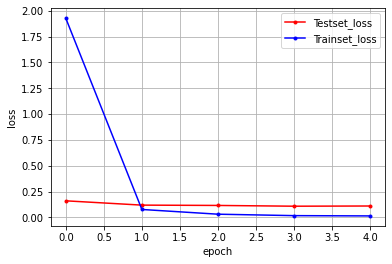

In [ ]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[:,:,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

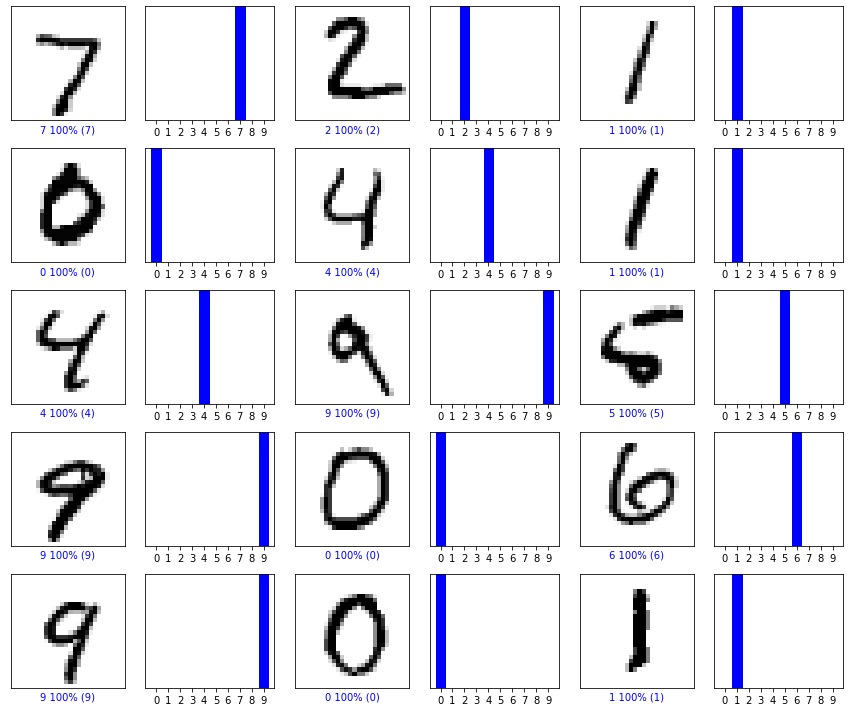

In [ ]:
predictions  = model.predict(x_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [ ]:
tf.__version__

'2.6.0'